In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


### Load the data you receive into a Pandas DataFrame.
Show the first five rows of the data set.

In [164]:
df = pd.read_csv('Admission_Predict.csv')
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Show the description 


In [166]:
df = pd.read_csv('Admission_Predict.csv')
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


### Show the info of the data set.


In [167]:
df = pd.read_csv('Admission_Predict.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


### Using a regression model, split your data into train and test data.
#### Fit your training split to the regression model.
#### Show your regression model’s score.

In [179]:
df = pd.read_csv('Admission_Predict.csv')
X = df.iloc[:, 1:-1].values
Y = df.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(
        X, Y, test_size = 0.3, random_state = 0)
lm = LinearRegression()
lm.fit(x_train, y_train)
pred = lm.predict(x_test)
print(lm.score(x_test,y_test))
print(lm.score(x_train, y_train))


0.7456624883029346
0.8221063439698572


### find the best 3 effect columns

In [180]:
from sklearn.feature_selection import GenericUnivariateSelect, chi2
y=(Y*100).astype(int)
x=(X*100).astype(int)
FeatureSelection = GenericUnivariateSelect(score_func= chi2, mode= 'k_best', param=3) # score_func can = f_classif : mode can = percentile,fpr,fdr,fwe 
x = FeatureSelection.fit_transform(x, y)
x.shape
print('Selected Features are : ' , FeatureSelection.get_support())


Selected Features are :  [ True  True  True False False False False]


## Draw at least three conclusions from your regression model

0.5452688774373154
0.6767079821182251


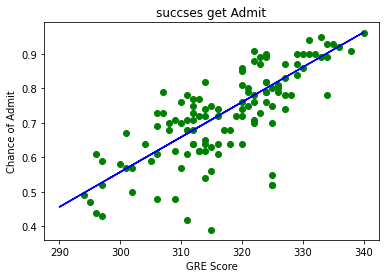

In [2]:
df = pd.read_csv('Admission_Predict.csv')
X = df.iloc[:, 1:-1].values
Y = df.iloc[:, -1].values
X2 = X[:,:1]
x_train, x_test, y_train, y_test = train_test_split(
        X2, Y, test_size = 0.3, random_state = 0)
lm = LinearRegression()
lm.fit(x_train, y_train)
pred = lm.predict(x_test)
print(lm.score(x_test,y_test))
print(lm.score(x_train, y_train))
plt.scatter(x_test, y_test, color = 'green')
plt.plot(x_train, lm.predict(x_train), color = 'blue')
plt.title('succses get Admit')
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.show()


0.4432842093191993
0.46047352049511303


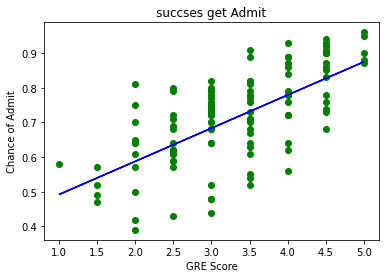

In [3]:
df = pd.read_csv('Admission_Predict.csv')
X = df.iloc[:, 1:-1].values
Y = df.iloc[:, -1].values
X2 = X[:,3:4]
x_train, x_test, y_train, y_test = train_test_split(
        X2, Y, test_size = 0.3, random_state = 0)
lm = LinearRegression()
lm.fit(x_train, y_train)
pred = lm.predict(x_test)
print(lm.score(x_test,y_test))
print(lm.score(x_train, y_train))
plt.scatter(x_test, y_test, color = 'green')
plt.plot(x_train, lm.predict(x_train), color = 'blue')
plt.title('succses get Admit')
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.show()

0.6760695288850005
0.7919512389657186


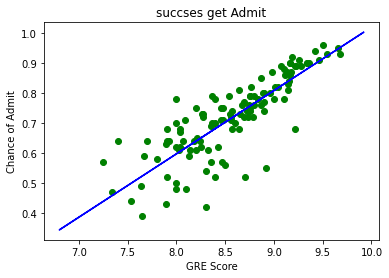

In [4]:
df = pd.read_csv('Admission_Predict.csv')
X = df.iloc[:, 1:-1].values
Y = df.iloc[:, -1].values
X2 = X[:,5:6]
x_train, x_test, y_train, y_test = train_test_split(
        X2, Y, test_size = 0.3, random_state = 0)
lm = LinearRegression()
lm.fit(x_train, y_train)
pred = lm.predict(x_test)
print(lm.score(x_test,y_test))
print(lm.score(x_train, y_train))
plt.scatter(x_test, y_test, color = 'green')
plt.plot(x_train, lm.predict(x_train), color = 'blue')
plt.title('succses get Admit')
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.show()